<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pick-a-sample-vessel" data-toc-modified-id="Pick-a-sample-vessel-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pick a sample vessel</a></span></li><li><span><a href="#Sort-based-on-ts" data-toc-modified-id="Sort-based-on-ts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sort based on ts</a></span></li><li><span><a href="#Drop-rows-with-duplicate" data-toc-modified-id="Drop-rows-with-duplicate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Drop rows with duplicate</a></span></li><li><span><a href="#Drop-outliers-based-on-ts" data-toc-modified-id="Drop-outliers-based-on-ts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Drop outliers based on ts</a></span></li><li><span><a href="#Reset-and-drop-index-col" data-toc-modified-id="Reset-and-drop-index-col-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reset and drop index col</a></span></li></ul></div>

In [1]:
# line with noise mmsi=371415000

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, MeanShift
from sklearn.preprocessing import MinMaxScaler
import psycopg2
from random import choice
import contextily as ctx
import numpy as np
from shapely.geometry import Point, LineString, shape
from tqdm import tqdm_notebook
import numpy as np
from multiprocessing import cpu_count, Pool
from functools import partial
import datetime
from lonelyboy.geospatial import plots as gsplt
from lonelyboy.geospatial import preprocessing as gspp
from lonelyboy.timeseries import lbtimeseries as tspp
import configparser, os
import PyQt5
import matplotlib.pyplot as plt
from matplotlib import style;  style.use('ggplot')
get_ipython().magic('matplotlib qt')

In [3]:
properties = configparser.ConfigParser()
properties.read(os.path.join('.','sql_server.ini'))
properties = properties['SERVER']

host    = properties['host']
db_name = properties['db_name']
uname   = properties['uname']
pw      = properties['pw']
port    = properties['port']

traj_sql = 'SELECT * FROM ais_data.dynamic_ships WHERE ts>1456802710 AND ts<1456975510  '
ports_sql = 'SELECT * FROM ports.ports_of_brittany'

con = psycopg2.connect(database=db_name, user=uname, password=pw, host=host, port = port)
# traj = gpd.GeoDataFrame.from_postgis(traj_sql, con, geom_col='geom' )
ports = gpd.GeoDataFrame.from_postgis(ports_sql, con, geom_col='geom' )

con.close()


ports.geom = ports.geom.apply(lambda x: x[0])

In [9]:
traj = pd.read_csv('data/updated_ais.csv', index_col=0)
traj.geom = traj[['lon', 'lat']].apply(lambda x: Point(x[0],x[1]), axis=1)
traj = gpd.GeoDataFrame(traj, geometry='geom')
traj.drop_duplicates(['ts','mmsi'], inplace=True)

In [28]:
# traj['d2np'] = traj.geom.apply(gspp.distance_to_nearest_port, args=(ports,))

In [4]:
#traj.memory_usage().sum()/(1024*1024)

* ### Pick a sample vessel
* ### Sort based on ts
* ### Drop rows with duplicate 
* ### Drop outliers based on ts
* ### Reset and drop index col

In [10]:
static = traj.loc[traj.speed == 0]
almost_static = traj.loc[(traj.speed <= 1) & (traj.speed > 0)]
not_static = traj.loc[traj.speed > 1]
static.reset_index(inplace=True)
almost_static.reset_index(inplace=True)
not_static.reset_index(inplace=True)

In [10]:
# static['d2np'] = static.geom.apply(gspp.distance_to_nearest_port, args=(ports,))
# print('done')
# almost_static['d2np'] = almost_static.geom.apply(gspp.distance_to_nearest_port, args=(ports,))
# print('done')
# not_static['d2np'] = not_static.geom.apply(gspp.distance_to_nearest_port, args=(ports,))
# print('done')

In [5]:
traj.loc[traj.d2np <= 0.03].speed.mean()

1.7066847235275036

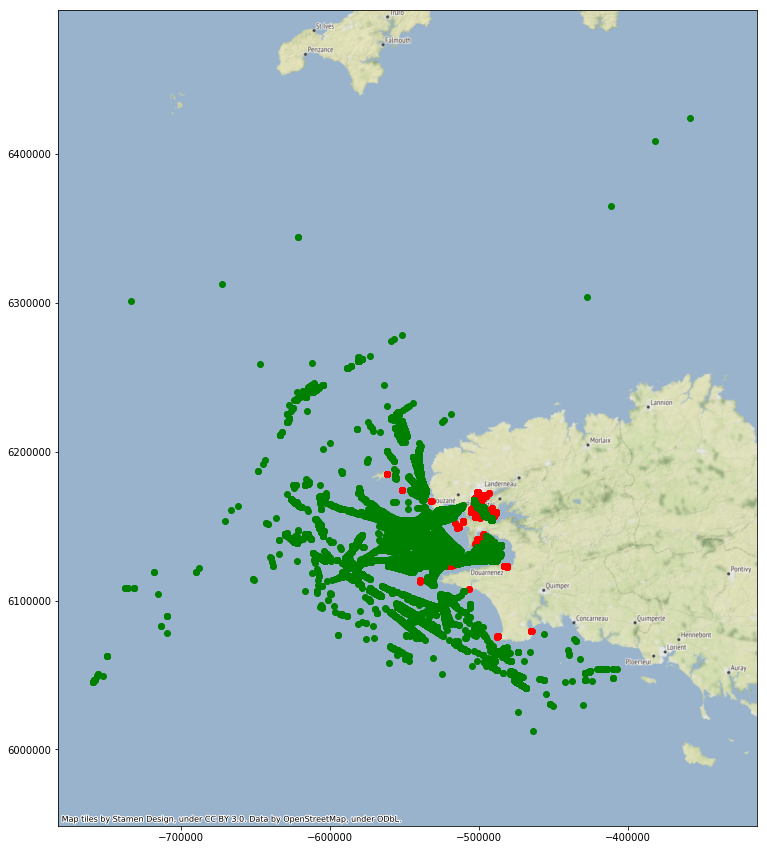

In [13]:
gsplt.map_plot(traj.loc[(traj.d2np <= 0.05) & (traj.speed <=2)], traj.loc[traj.d2np > 0.05])

In [46]:
for _, df in tqdm_notebook(traj.groupby('mmsi')):
    


,id,mmsi,status,turn,speed,course,heading,lon,lat,ts,geom,d2np
37290,17552952,212228000,0.0,-126.0,5.5,37.0,17,-5.628232,48.72122,1456930088,POINT (-5.6282315 48.72122),0.595299


In [ ]:
def split_trajectories(df):
    pois = gspp.detect_POIs(df)
    

In [60]:
len(pois)

4

In [56]:
tmp.iloc[242].velocity

0.047969975685119112

In [53]:
almost_static['distance_to_nearest_port'] = almost_static.geom.apply(distance_to_nearest_port, args=(ports,))

/home/theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
